##Type 2 ANOMA

일반선형모델: 종속변수가 따르는 확률분포를 정규분포 이외의 분포에도 사용 가능하게 한 선형모델

복수의 독립변수가 있을 경우 그 변수들의 유의미함을 어떻게 판정하는지

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3
%matplotlib inline

In [4]:
sales=pd.read_csv("5-3-1-lm-model.csv")
sales.head(3)

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy


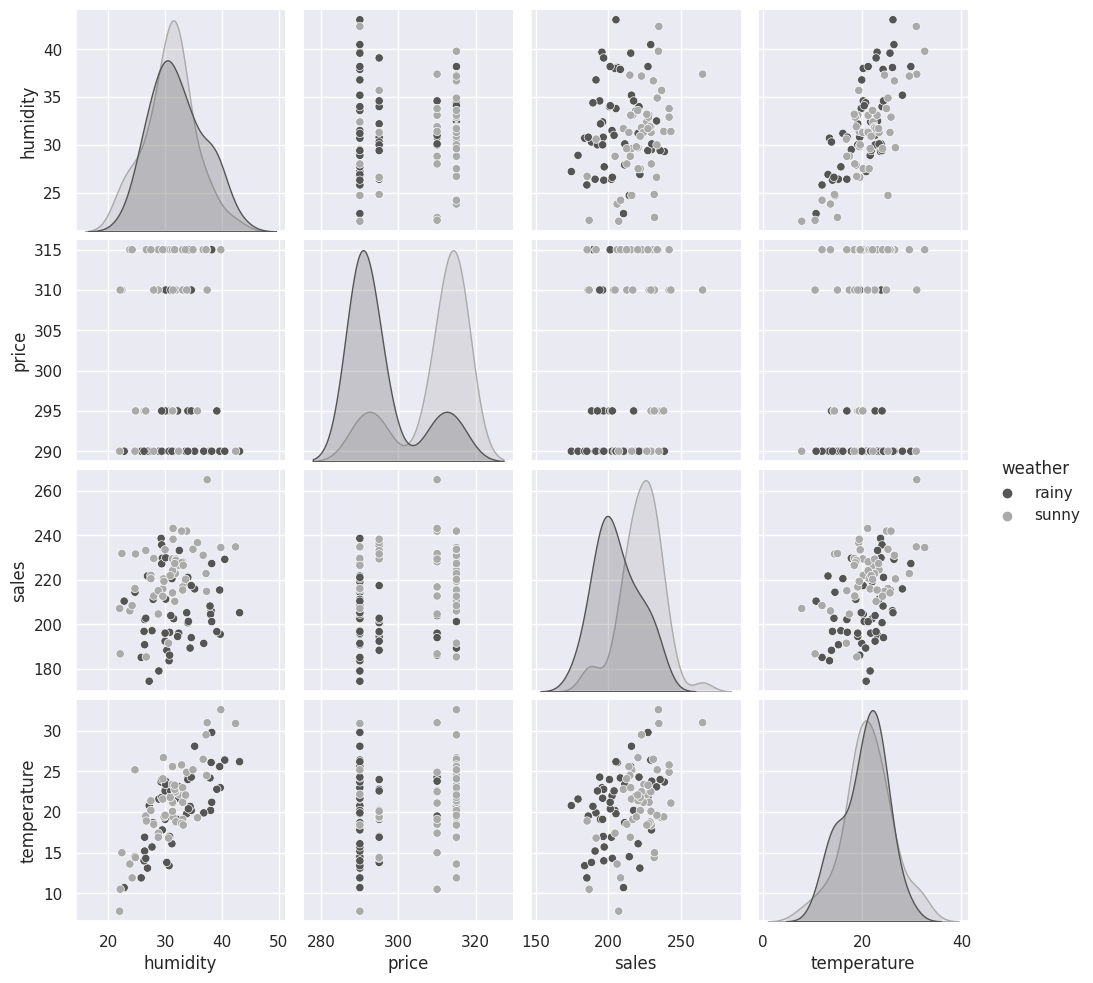

In [5]:
sns.pairplot(data=sales, hue="weather", palette="gray")

나쁜 분석의 예: 변수가 1개인 모델 만들기

In [6]:
lm_dame=smf.ols("sales~price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [7]:
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


가격을 올릴수록 매상이 증가한다는 결론이 나와버림

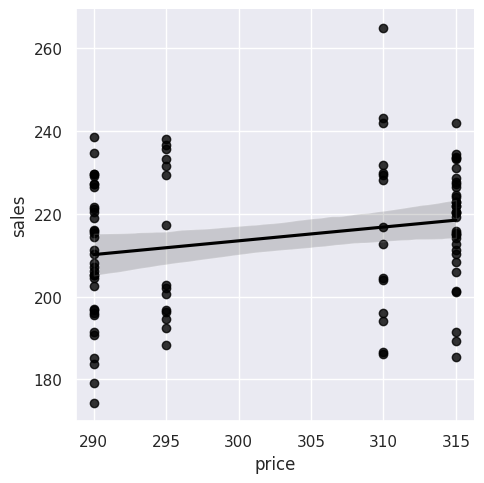

In [8]:
sns.lmplot(x="price",y="sales",data=sales, scatter_kws={"color":"black"},line_kws={"color":"black"})

독립변수간의 관계 조사하기

In [10]:
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


-> 비가 오는 날에는 매상이 떨어지기 때문에 가격을 인하했다고 생각해야

-> 그럼 날씨가 같았을 때 상품 가격이 매상에 미치는 영향은?

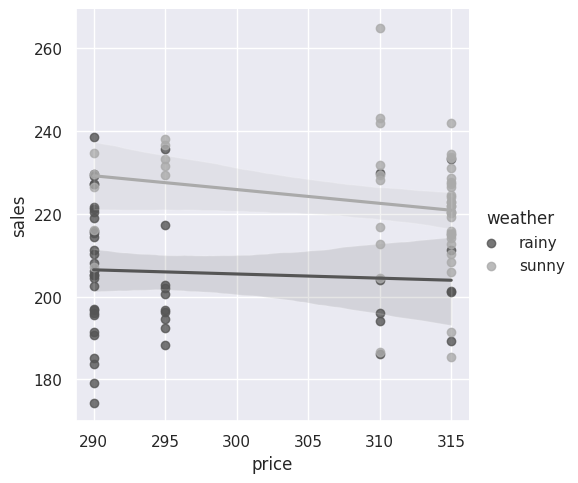

In [11]:
sns.lmplot(x="price",y="sales",data=sales, hue="weather", palette="gray")

-> 맑은 날이 높은 매상, 가격이 높아지면 매상 줄어듦

복수의 독립변수 가지는 모델

In [12]:
lm_sales=smf.ols("sales~weather+humidity+temperature+price", data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

나쁜 분석: Type 1 ANOVA를 쓰면 독립변수 넣는 순서에 따라 검정 결과 바뀜

회귀계수의 t검정

-> 분산분석 대신 회귀계수의 t검정 쓰면 문제 x

-> 단, 카테고리 변수가 2개 이하일때만 ㄱㄴ

In [15]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


Type 2 ANOVA: 독립변수 넣는 순서 바꾸어도 검정 결과가 변하지 않는 분산분석

기존 Type 1 방식으로 변수를 1개씩 늘려나가 보기

In [17]:
#NULL 모델의 잔차제곱합
mod_null=smf.ols("sales~1",sales).fit()
resid_sq_null=sp.sum(mod_null.resid**2)
resid_sq_null

28968.525899999993

In [22]:
#날씨 모델의 잔차제곱합
mod_1=smf.ols("sales~weather",sales).fit()
resid_sq_1=sp.sum(mod_1.resid**2)
resid_sq_1

21917.565

In [23]:
resid_sq_null-resid_sq_1

7050.960899999995

In [24]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


날씨의 변화에 따른 군간 편차제곱합은 모델에 날씨라는 독립변수를 추가하는 것으로 인해 감소하는 잔차제곱합과 일치

In [26]:
#날씨 + 습도 모델의 잔차제곱합
mod_2=smf.ols("sales~weather+humidity",sales).fit()
resid_sq_2=sp.sum(mod_2.resid**2)
resid_sq_2

20137.963897851758

In [27]:
resid_sq_1 - resid_sq_2

1779.601102148241

In [28]:
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


-> 분산분석은 독립변수를 1개씩 늘려가면서 감소했던 잔차제곱합의 크기를 기반으로 독립변수 효과의 크기 정량화

In [29]:
#날씨 + 기온 모델의 잔차제곱합
mod_2_2=smf.ols("sales~weather+temperature",sales).fit()
resid_sq_2_2=sp.sum(mod_2_2.resid**2)
resid_sq_2_2

18102.78642671222

In [30]:
#날씨 + 기온 + 습도 모델의 잔차제곱합
mod_3_2=smf.ols("sales~weather+temperature+humidity", sales).fit()
resid_sq_3_2=sp.sum(mod_3_2.resid**2)
resid_sq_3_2

18061.119361588426

In [31]:
resid_sq_2_2 - resid_sq_3_2

41.6670651237946

-> 습도 효과의 크기가 작음

In [32]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN


-> 복수의 독립변수를 가지는 경우, Type 1은 독립변수를 1개씩 늘려나가며 감소한 잔차제곱합의 크기에 기반해 효과의 크기를 계산

-> 이는 독립변수 추가하는 순서에 따라 sum_sq값도 크게 바뀜

**=즉 독립변수가 여러개일 경우 type 1 을 사용하면 잘못된 결과 얻을 가능성 높음!**

Type 2 ANOVA와 수정제곱합

-> Type 1이 독립변수 추가하면서 비교했다면 Type 2는 각 독립변수 뺀 모델을 모든 독립변수 넣은 모델과 전부 비교

Type 2 ANOVA 실습

In [33]:
#모든 변수가 포함된 모델의 잔차제곱합
mod_full=smf.ols("sales~weather+humidity+temperature+price", sales).fit()
resid_sq_full=sp.sum(mod_full.resid**2)
resid_sq_full

17242.716942366478

In [34]:
#습도만 제거
mod_non_humi=smf.ols("sales~weather+temperature+price",sales).fit()
resid_sq_non_humi=sp.sum(mod_non_humi.resid**2)
resid_sq_non_humi

17299.142016107653

In [35]:
resid_sq_non_humi-resid_sq_full

56.425073741174856

In [36]:
print(sm.stats.anova_lm(mod_full,typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [37]:
mod_full.compare_f_test(mod_non_humi)

(0.3108780375696364, 0.578453342712073, 1.0)

F비, p값, 2개 모델의 자유도 차이

In [38]:
print(sm.stats.anova_lm(mod_non_humi,typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


=> 유의미하지 않은 변수 없음, 변수선택 종료

In [39]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

AIC를 이용한 변수선택

In [40]:
print("모든 변수를 포함한 모델: ",mod_full.aic.round(3))
print("습도를 제외한 모델: ", mod_non_humi.aic.round(3))

모든 변수를 포함한 모델:  808.785
습도를 제외한 모델:  807.112


-> 습도를 제외한 모델의 AIC가 더 작아졌으므로 습도는 제외해야 됨